<a href="https://colab.research.google.com/github/sanchi191/limb-detection-framework/blob/main/final_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
train_df = pd.read_csv('/content/drive/MyDrive/model/train.csv')
#train_df.head()
test_df = pd.read_csv('/content/drive/MyDrive/model/test.csv')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


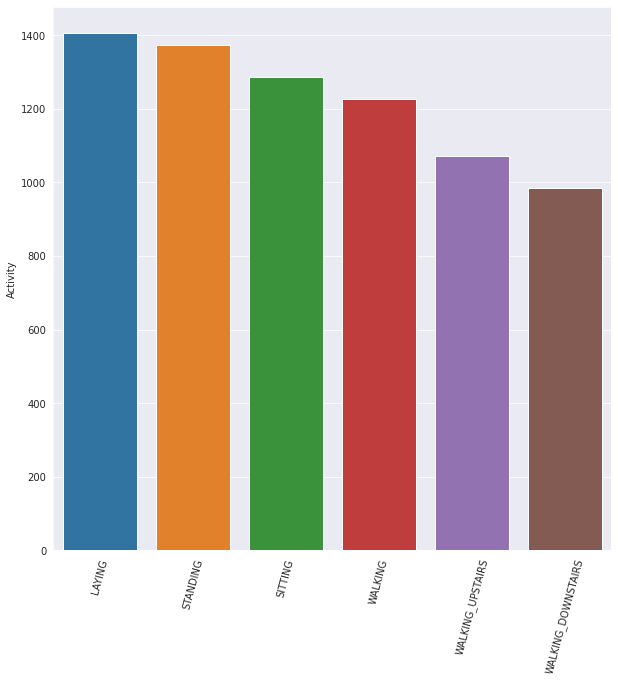

In [ ]:
X_train = train_df.iloc[:, :-2]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-2]
y_test = test_df.iloc[:, -1]
class_label = y_train.value_counts()
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75)
sns.barplot(class_label.index, class_label);

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values
y_test = label_encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values
y_train = np.array(y_train)
y_test = np.array(y_test)
pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
def train_2d_cnn():
    x = x_input = layers.Input(shape=(128, 128, 3))

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x) # size: 64x64

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)  # size: 64x64

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x)  # size: 32x32

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x)  # size: 16x16

    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x) # size: 8x8x

    x_prob = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid', name='x_prob')(x)
    x_boxes = layers.Conv2D(4, kernel_size=3, padding='same', name='x_boxes')(x)
    x_cls = layers.Conv2D(10, kernel_size=3, padding='same', activation='sigmoid', name='x_cls')(x)

    # ---

    gate = tf.where(x_prob > 0.5, tf.ones_like(x_prob), tf.zeros_like(x_prob))
    x_boxes = x_boxes * gate
    x_cls = x_cls * gate

    # ---

    x = layers.Concatenate()([x_prob, x_boxes, x_cls])

    model = tf.keras.models.Model(x_input, x)
    summary = model.summary()
    return summary
def gate():
    gate = tf.where(x_prob > 0.5, tf.ones_like(x_prob), tf.zeros_like(x_prob))
    x_boxes = x_boxes * gate
    x_cls = x_cls * gate
    return c_cls
#This code will output zero and stop gradient of low probability area.

#Then combine the outputs and the model.

x = layers.Concatenate()([x_prob, x_boxes, x_cls])
model = tf.keras.models.Model(x_input, x)
model.summary()
idx_p = [0]
idx_bb = [1, 2, 3, 4]
idx_cls = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


@tf.function
def loss_bb(y_true, y_pred):
    y_true = tf.gather(y_true, idx_bb, axis=-1)
    y_pred = tf.gather(y_pred, idx_bb, axis=-1)

    loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
    return tf.reduce_mean(loss[loss > 0.0])


@tf.function
def loss_p(y_true, y_pred):
    y_true = tf.gather(y_true, idx_p, axis=-1)
    y_pred = tf.gather(y_pred, idx_p, axis=-1)

    loss = tf.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_sum(loss)
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=64,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=64,activation='relu'))
model.add(keras.layers.Dense(units=6,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=15, validation_split=0.2)

Epoch 1/15
46/46 [==============================] - 2s 10ms/step - loss: 0.7310 - accuracy: 0.7562 - val_loss: 0.2855 - val_accuracy: 0.9007
Epoch 2/15
46/46 [==============================] - 0s 5ms/step - loss: 0.0989 - accuracy: 0.9721 - val_loss: 0.1760 - val_accuracy: 0.9347
Epoch 3/15
46/46 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.1678 - val_accuracy: 0.9347
Epoch 4/15
46/46 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.9937 - val_loss: 0.1675 - val_accuracy: 0.9422
Epoch 5/15
46/46 [==============================] - 0s 6ms/step - loss: 0.0175 - accuracy: 0.9952 - val_loss: 0.2224 - val_accuracy: 0.9334
Epoch 6/15
46/46 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.9930 - val_loss: 0.1842 - val_accuracy: 0.9477
Epoch 7/15
46/46 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.1807 - val_accuracy: 0.9490
Epoch 8/15
46/46 [=

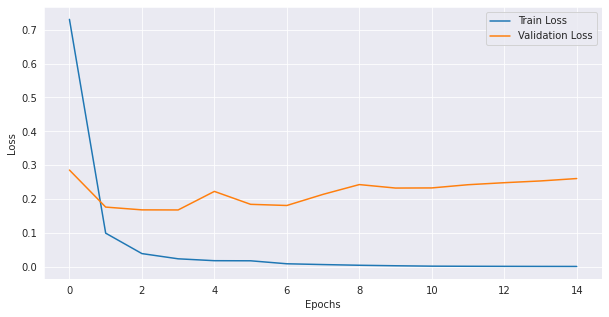

In [ ]:
## Loss Vs. Epochs

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss']);

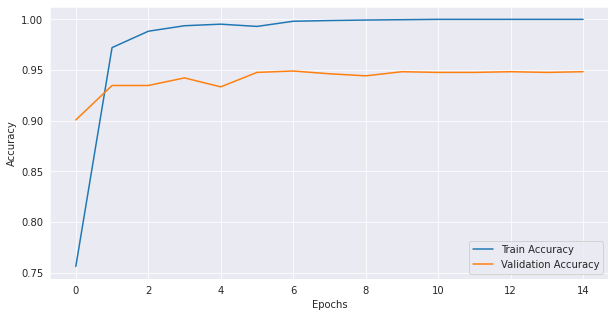

In [ ]:
## Accuracy Vs. Epochs

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy']);

In [ ]:
pred = model.predict(X_test)
predic = []
for p in pred:
    p = np.argmax(p)
    predic.append(p)
predic = np.array(predic)

In [ ]:
y_test[0]
y_test_label = []
for i in range(len(y_test)):
    for ind, j in enumerate(y_test[i]):
        if j == 1:
            y_test_label.append(ind)
y_test_label = np.array(y_test_label)
print(classification_report(y_test_label, predic))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       537
           1       0.97      0.87      0.92       491
           2       0.85      0.98      0.91       532
           3       0.92      0.99      0.95       496
           4       0.97      0.94      0.95       420
           5       0.96      0.92      0.94       471

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



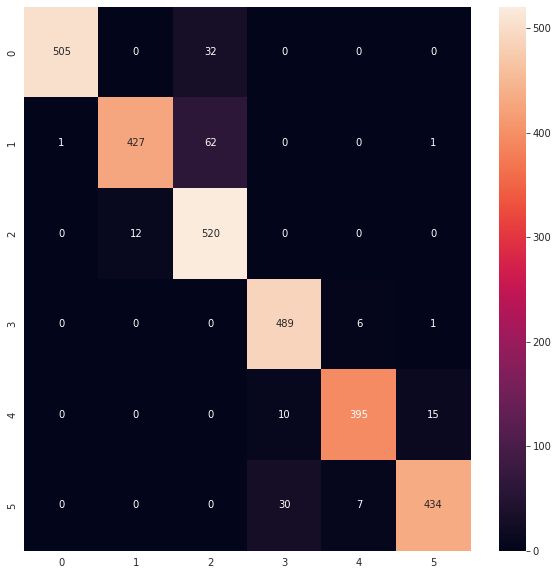

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test_label, predic), annot=True, fmt='g')

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test_label, predic))

Accuracy Score:  0.9399389209365456
